In [9]:
# EDA UNIFICADO - ANÁLISIS EXPLORATORIO COMPLETO
# Análisis de Fallas de Fibra Óptica (2020-2025)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

# Configuración para visualizaciones
try:
    plt.style.use("seaborn-v0_8")
except OSError:
    try:
        plt.style.use("seaborn")
    except OSError:
        plt.style.use("default")

plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams["font.size"] = 12
sns.set_palette("husl")


In [10]:
# FUNCIÓN DE CARGA DE DATOS

def cargar_datos():
    """Cargar datos limpios desde el proceso de cleaning"""
    try:
        df = pd.read_pickle("../data/processed/fallas_cerradas_fibra_optica.pkl")
        print(f"📊 Datos cargados: {len(df):,} registros, {df.shape[1]} columnas")
        print(f"📅 Período: {df['inicio_falla'].dt.year.min()}-{df['inicio_falla'].dt.year.max()}")
        return df
    except Exception as e:
        print(f"❌ Error cargando datos: {e}")
        return None

# Cargar datos
df = cargar_datos()


📊 Datos cargados: 4,938 registros, 35 columnas
📅 Período: 2022-2025


In [3]:
# EDA RÁPIDO - MÉTRICAS CLAVE

print("\n⚡ EDA RÁPIDO - MÉTRICAS CLAVE")
print("=" * 50)

if df is not None:
    print(f"\n📊 RESUMEN GENERAL:")
    print(f"   • Total registros: {len(df):,}")
    print(f"   • Columnas: {df.shape[1]}")
    print(f"   • Duplicados: {df.duplicated().sum()}")
    print(f"   • Missing values: {df.isnull().sum().sum()}")
    print(f"   • Período: {df['inicio_falla'].dt.year.min()}-{df['inicio_falla'].dt.year.max()}")

    print(f"\n🎯 VARIABLE OBJETIVO (tiempo_total):")
    tiempo = df["tiempo_total"]
    print(f"   • Media: {tiempo.mean():.1f} horas")
    print(f"   • Mediana: {tiempo.median():.1f} horas")
    print(f"   • Min-Max: {tiempo.min():.1f} - {tiempo.max():.1f} horas")
    print(f"   • % casos > 24h: {(tiempo > 24).mean()*100:.1f}%")
    print(f"   • % casos > 72h: {(tiempo > 72).mean()*100:.1f}%")

    print(f"\n🏷️ TOP CATEGORÍAS:")
    for cat, count in df["categoria"].value_counts().head(5).items():
        pct = (count / len(df)) * 100
        print(f"   • {cat}: {count:,} ({pct:.1f}%)")

    print(f"\n🌍 TOP REGIONES:")
    for region, count in df["tg_region"].value_counts().head(5).items():
        pct = (count / len(df)) * 100
        print(f"   • {region}: {count:,} ({pct:.1f}%)")

    print(f"\n🚨 SEVERIDAD:")
    for sev, count in df["severidad"].value_counts().items():
        pct = (count / len(df)) * 100
        tiempo_prom = df[df["severidad"] == sev]["tiempo_total"].mean()
        print(f"   • {sev}: {count:,} ({pct:.1f}%) - {tiempo_prom:.1f}h promedio")

    print(f"\n📅 PATRONES TEMPORALES:")
    print(f"   • Hora pico: {df['inicio_falla'].dt.hour.value_counts().index[0]:02d}:00h")
    print(f"   • Día más problemático: {df['inicio_falla'].dt.day_name().value_counts().index[0]}")
    print(f"   • Mes más problemático: {df['inicio_falla'].dt.month.value_counts().index[0]}")

    print(f"\n✅ EDA RÁPIDO COMPLETADO")



⚡ EDA RÁPIDO - MÉTRICAS CLAVE

📊 RESUMEN GENERAL:
   • Total registros: 4,938
   • Columnas: 35
   • Duplicados: 0
   • Missing values: 0
   • Período: 2022-2025

🎯 VARIABLE OBJETIVO (tiempo_total):
   • Media: 23.3 horas
   • Mediana: 8.6 horas
   • Min-Max: 0.8 - 11780.2 horas
   • % casos > 24h: 6.9%
   • % casos > 72h: 1.7%

🏷️ TOP CATEGORÍAS:
   • DATOS: 1,978 (40.1%)
   • TRANSMISION: 1,418 (28.7%)
   • MOVIL: 891 (18.0%)
   • CONMUTACION: 531 (10.8%)
   • CLARO TV: 106 (2.1%)

🌍 TOP REGIONES:
   • ORIENTE: 1,504 (30.5%)
   • OCCIDENTE: 1,255 (25.4%)
   • CENTRAL: 1,120 (22.7%)
   • METROPOLITANA: 1,053 (21.3%)
   • NAM: 3 (0.1%)

🚨 SEVERIDAD:
   • Critica: 3,642 (73.8%) - 12.4h promedio
   • Media: 553 (11.2%) - 86.5h promedio
   • Alta: 446 (9.0%) - 18.4h promedio
   • Baja: 297 (6.0%) - 47.0h promedio

📅 PATRONES TEMPORALES:
   • Hora pico: 11:00h
   • Día más problemático: Wednesday
   • Mes más problemático: 6

✅ EDA RÁPIDO COMPLETADO


In [4]:
# SECCIÓN 1: RESUMEN GENERAL

print("\n📋 SECCIÓN 1: RESUMEN GENERAL")
print("-" * 50)

if df is not None:
    print(f"📊 INFORMACIÓN BÁSICA:")
    print(f"   • Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
    print(f"   • Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    print(f"   • Duplicados: {df.duplicated().sum():,}")
    print(f"   • IDs únicos: {df['id_ticket'].nunique():,}")
    print(f"   • Missing values: {df.isnull().sum().sum()}")

    print(f"\n📅 COBERTURA TEMPORAL:")
    inicio_min = df["inicio_falla"].min()
    inicio_max = df["inicio_falla"].max()
    duracion = inicio_max - inicio_min
    print(f"   • Fecha más antigua: {inicio_min.date()}")
    print(f"   • Fecha más reciente: {inicio_max.date()}")
    print(f"   • Duración total: {duracion.days:,} días ({duracion.days/365.25:.1f} años)")

    print(f"\n📈 DISTRIBUCIÓN POR AÑO:")
    por_año = df["inicio_falla"].dt.year.value_counts().sort_index()
    for año, count in por_año.items():
        pct = (count / len(df)) * 100
        print(f"   • {año}: {count:,} fallas ({pct:.1f}%)")

    print(f"\n🔢 TIPOS DE DATOS:")
    tipos = df.dtypes.value_counts()
    for tipo, count in tipos.items():
        print(f"   • {tipo}: {count} columnas")



📋 SECCIÓN 1: RESUMEN GENERAL
--------------------------------------------------
📊 INFORMACIÓN BÁSICA:
   • Dimensiones: 4,938 filas × 35 columnas
   • Memoria utilizada: 8.9 MB
   • Duplicados: 0
   • IDs únicos: 4,938
   • Missing values: 0

📅 COBERTURA TEMPORAL:
   • Fecha más antigua: 2022-02-15
   • Fecha más reciente: 2025-07-15
   • Duración total: 1,246 días (3.4 años)

📈 DISTRIBUCIÓN POR AÑO:
   • 2022: 994 fallas (20.1%)
   • 2023: 1,226 fallas (24.8%)
   • 2024: 1,680 fallas (34.0%)
   • 2025: 1,038 fallas (21.0%)

🔢 TIPOS DE DATOS:
   • object: 16 columnas
   • datetime64[ns]: 5 columnas
   • float64: 2 columnas
   • int64: 2 columnas
   • category: 1 columnas
   • category: 1 columnas
   • category: 1 columnas
   • category: 1 columnas
   • category: 1 columnas
   • category: 1 columnas
   • category: 1 columnas
   • category: 1 columnas
   • category: 1 columnas
   • category: 1 columnas


In [5]:
# SECCIÓN 2: VARIABLE OBJETIVO (tiempo_total)

print("\n🎯 SECCIÓN 2: VARIABLE OBJETIVO (tiempo_total)")
print("-" * 50)

if df is not None:
    tiempo = df["tiempo_total"]

    print(f"📊 ESTADÍSTICAS DESCRIPTIVAS:")
    print(f"   • Media: {tiempo.mean():.2f} horas")
    print(f"   • Mediana: {tiempo.median():.2f} horas")
    print(f"   • Desviación estándar: {tiempo.std():.2f} horas")
    print(f"   • Min-Max: {tiempo.min():.2f}h - {tiempo.max():.2f}h")
    print(f"   • Coeficiente de variación: {(tiempo.std()/tiempo.mean())*100:.1f}%")

    print(f"\n📈 PERCENTILES CLAVE:")
    percentiles = [5, 10, 25, 50, 75, 90, 95, 99, 99.5, 99.9]
    for p in percentiles:
        valor = tiempo.quantile(p / 100)
        if p == int(p):
            print(f"   • P{int(p):2d}: {valor:6.2f} horas ({valor/24:.1f} días)")
        else:
            print(f"   • P{p:4.1f}: {valor:6.2f} horas ({valor/24:.1f} días)")

    # Análisis de outliers
    Q1 = tiempo.quantile(0.25)
    Q3 = tiempo.quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    
    outliers_mod = tiempo[(tiempo < limite_inf) | (tiempo > limite_sup)]
    outliers_ext = tiempo[(tiempo < Q1 - 3 * IQR) | (tiempo > Q3 + 3 * IQR)]
    
    print(f"\n🎯 ANÁLISIS DE OUTLIERS:")
    print(f"   • Límite inferior (Q1 - 1.5*IQR): {limite_inf:.2f} horas")
    print(f"   • Límite superior (Q3 + 1.5*IQR): {limite_sup:.2f} horas")
    print(f"   • Outliers moderados: {len(outliers_mod):,} ({len(outliers_mod)/len(tiempo)*100:.1f}%)")
    print(f"   • Outliers extremos: {len(outliers_ext):,} ({len(outliers_ext)/len(tiempo)*100:.1f}%)")

    print(f"\n⏱️ CATEGORIZACIÓN POR DURACIÓN:")
    rangos = [
        (0, 2, "Rápida (< 2h)"),
        (2, 8, "Normal (2-8h)"),
        (8, 24, "Lenta (8-24h)"),
        (24, 72, "Crítica (1-3 días)"),
        (72, float("inf"), "Extrema (>3 días)"),
    ]

    for min_h, max_h, etiqueta in rangos:
        if max_h == float("inf"):
            mask = tiempo >= min_h
        else:
            mask = (tiempo >= min_h) & (tiempo < max_h)
        count = mask.sum()
        pct = (count / len(tiempo)) * 100
        print(f"   • {etiqueta}: {count:,} ({pct:.1f}%)")



🎯 SECCIÓN 2: VARIABLE OBJETIVO (tiempo_total)
--------------------------------------------------
📊 ESTADÍSTICAS DESCRIPTIVAS:
   • Media: 23.31 horas
   • Mediana: 8.61 horas
   • Desviación estándar: 235.30 horas
   • Min-Max: 0.82h - 11780.24h
   • Coeficiente de variación: 1009.2%

📈 PERCENTILES CLAVE:
   • P 5:   3.69 horas (0.2 días)
   • P10:   4.56 horas (0.2 días)
   • P25:   6.13 horas (0.3 días)
   • P50:   8.61 horas (0.4 días)
   • P75:  12.90 horas (0.5 días)
   • P90:  20.36 horas (0.8 días)
   • P95:  27.75 horas (1.2 días)
   • P99: 125.03 horas (5.2 días)
   • P99.5: 402.95 horas (16.8 días)
   • P99.9: 3232.59 horas (134.7 días)

🎯 ANÁLISIS DE OUTLIERS:
   • Límite inferior (Q1 - 1.5*IQR): -4.02 horas
   • Límite superior (Q3 + 1.5*IQR): 23.05 horas
   • Outliers moderados: 368 (7.5%)
   • Outliers extremos: 178 (3.6%)

⏱️ CATEGORIZACIÓN POR DURACIÓN:
   • Rápida (< 2h): 24 (0.5%)
   • Normal (2-8h): 2,163 (43.8%)
   • Lenta (8-24h): 2,410 (48.8%)
   • Crítica (1-3 d

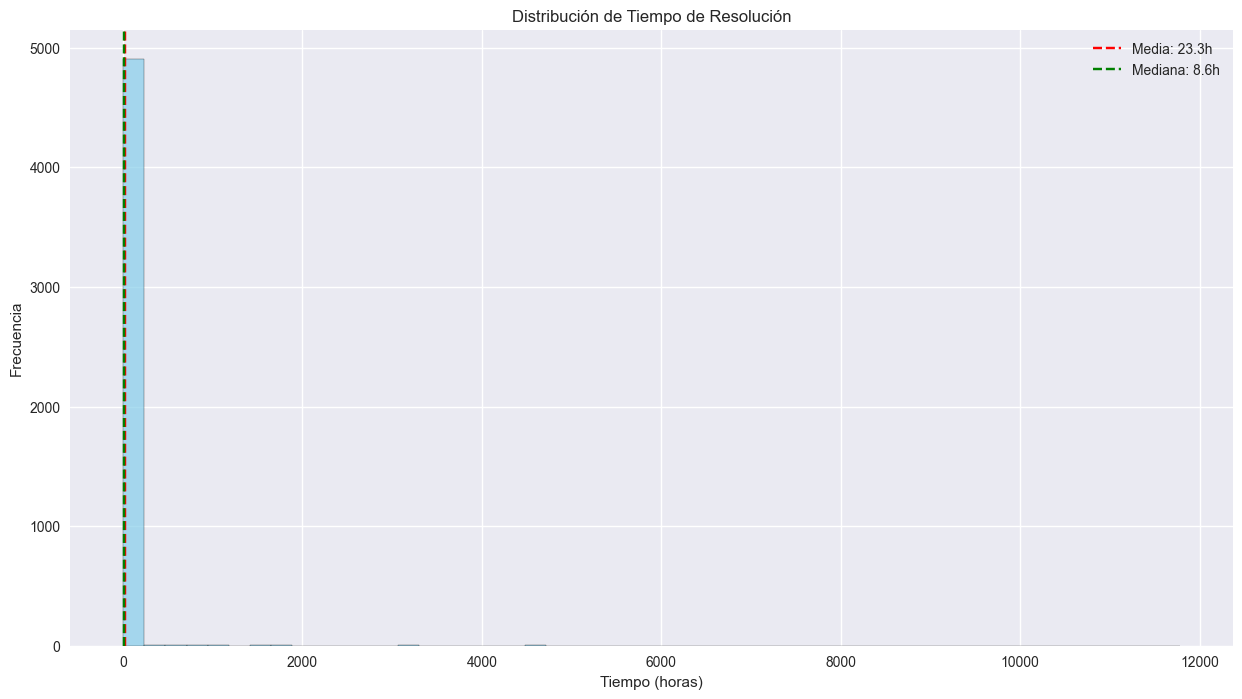

In [43]:

plt.hist(df["tiempo_total"], bins=50, alpha=0.7, color="skyblue", edgecolor="black")
plt.axvline(df["tiempo_total"].mean(), color="red", linestyle="--", 
            label=f'Media: {df["tiempo_total"].mean():.1f}h')
plt.axvline(df["tiempo_total"].median(), color="green", linestyle="--",
            label=f'Mediana: {df["tiempo_total"].median():.1f}h')
plt.title("Distribución de Tiempo de Resolución")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Frecuencia")
plt.legend()

(array([1, 2, 3, 4]),
 [Text(1, 0, 'Alta'),
  Text(2, 0, 'Baja'),
  Text(3, 0, 'Critica'),
  Text(4, 0, 'Media')])

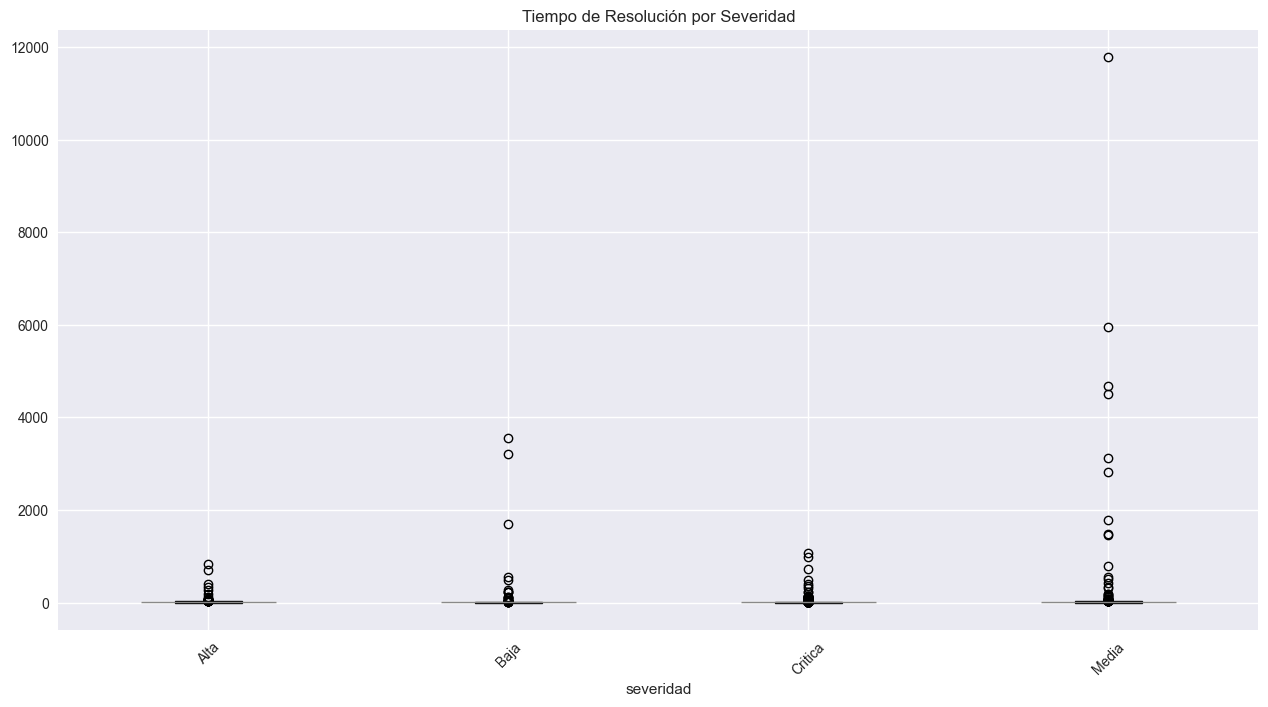

In [42]:
# 2. Box plot por severidad
df.boxplot(column="tiempo_total", by="severidad", ax=plt.gca())
plt.title("Tiempo de Resolución por Severidad")
plt.suptitle("")
plt.xticks(rotation=45)

(array([636, 648, 660]),
 [Text(636, 0, 'Jan\n2023'),
  Text(648, 0, 'Jan\n2024'),
  Text(660, 0, 'Jan\n2025')])

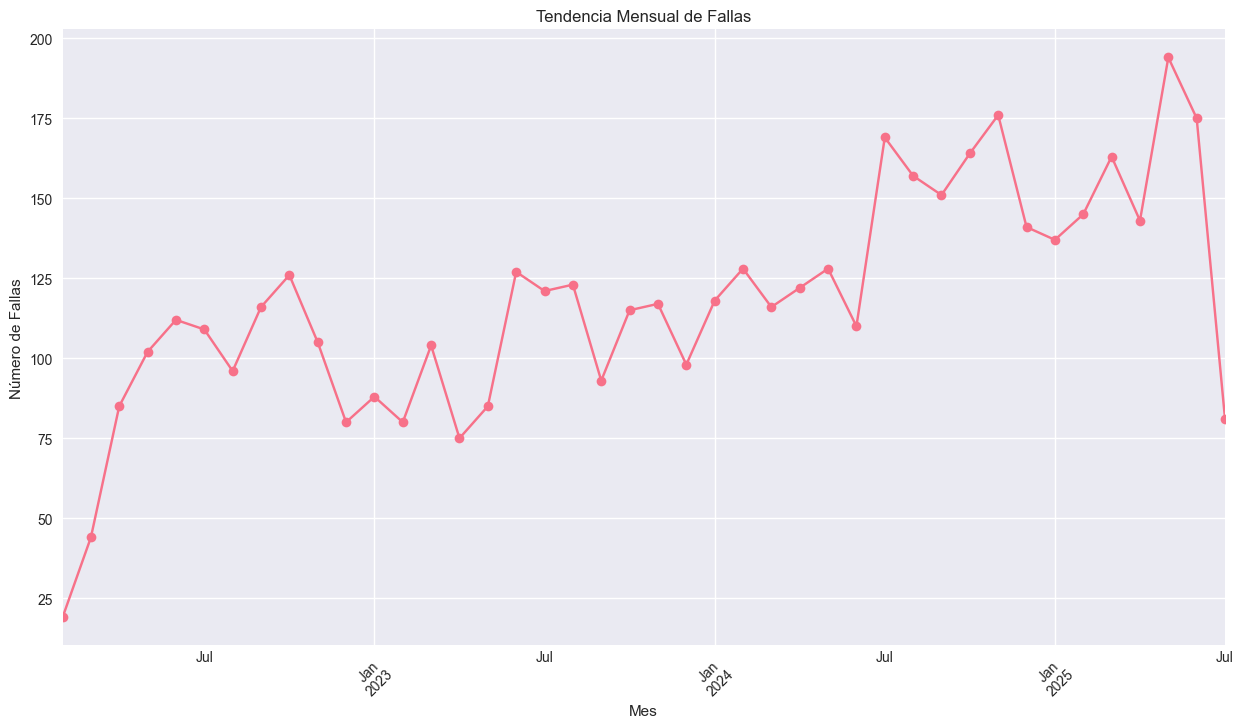

In [40]:

# 3. Tendencia temporal (por mes)
monthly_counts = df.groupby(df["inicio_falla"].dt.to_period("M")).size()
monthly_counts.plot(kind="line", marker="o")
plt.title("Tendencia Mensual de Fallas")
plt.xlabel("Mes")
plt.ylabel("Número de Fallas")
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'DATOS'),
  Text(1, 0, 'TRANSMISION'),
  Text(2, 0, 'MOVIL'),
  Text(3, 0, 'CONMUTACION'),
  Text(4, 0, 'CLARO TV'),
  Text(5, 0, 'LOGISTICA'),
  Text(6, 0, 'FUERZA Y CLIMA'),
  Text(7, 0, 'PLANTA EXTERNA')])

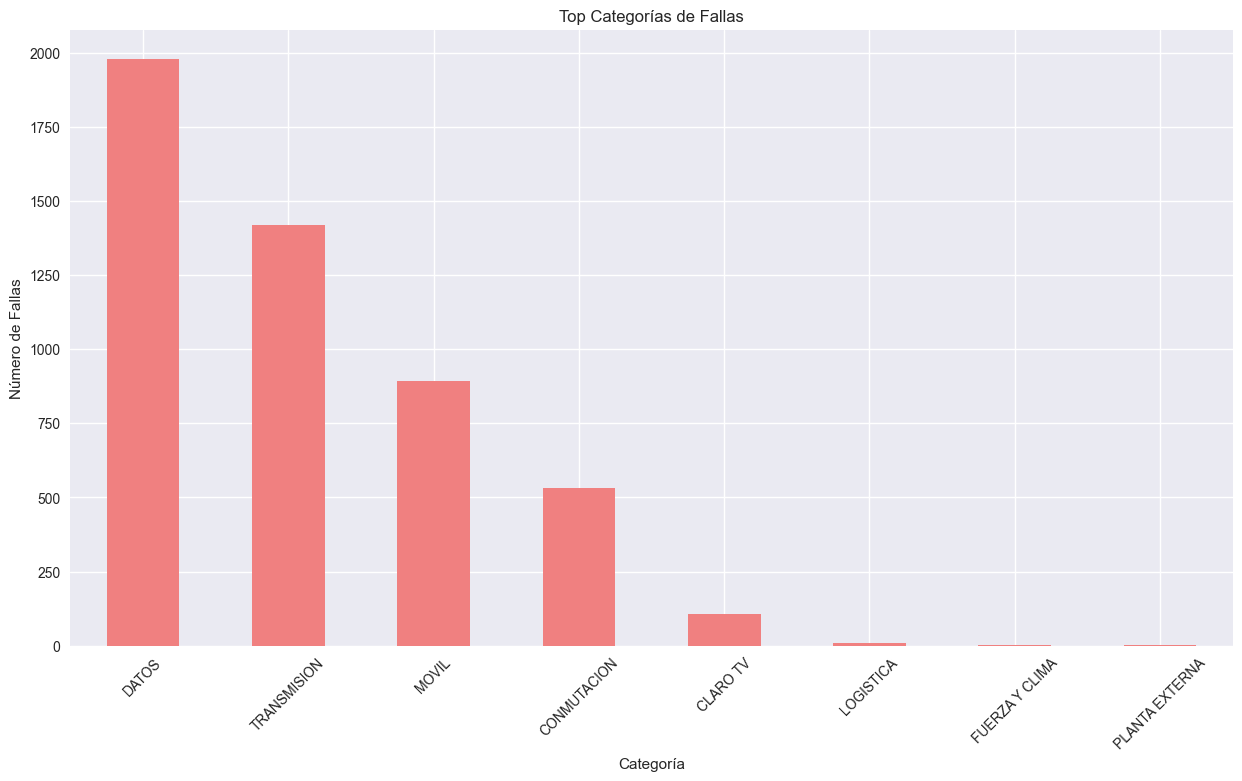

In [39]:
# 4. Top categorías
cat_counts = df["categoria"].value_counts().head(8)
cat_counts.plot(kind="bar", color="lightcoral")
plt.title("Top Categorías de Fallas")
plt.xlabel("Categoría")
plt.ylabel("Número de Fallas")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'ORIENTE'),
  Text(1, 0, 'OCCIDENTE'),
  Text(2, 0, 'CENTRAL'),
  Text(3, 0, 'METROPOLITANA'),
  Text(4, 0, 'NAM'),
  Text(5, 0, 'ATLANTICO CR'),
  Text(6, 0, 'OCCIDENTAL SV'),
  Text(7, 0, 'PX METRO SUR')])

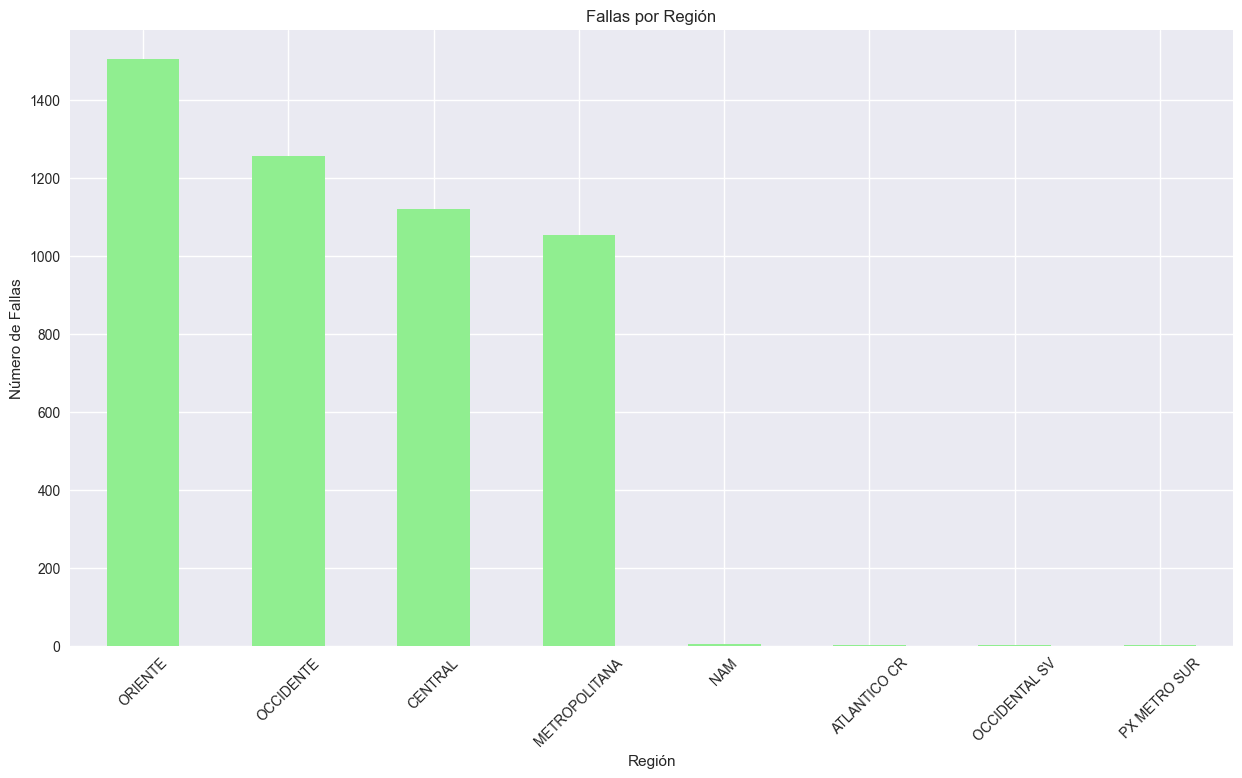

In [38]:
# 5. Distribución por región
region_counts = df["tg_region"].value_counts()
region_counts.plot(kind="bar", color="lightgreen")
plt.title("Fallas por Región")
plt.xlabel("Región")
plt.ylabel("Número de Fallas")
plt.xticks(rotation=45)

Text(0, 0.5, 'Número de Fallas')

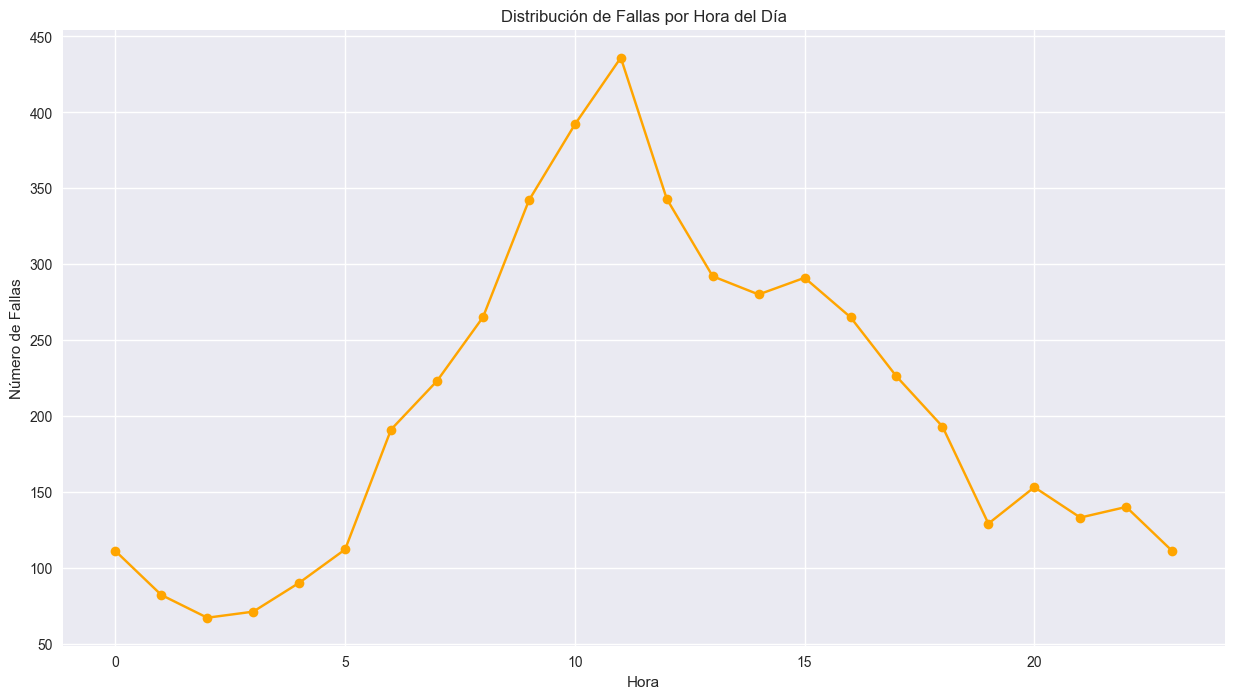

In [37]:
# 6. Patrones horarios
hourly_counts = df["inicio_falla"].dt.hour.value_counts().sort_index()
hourly_counts.plot(kind="line", marker="o", color="orange")
plt.title("Distribución de Fallas por Hora del Día")
plt.xlabel("Hora")
plt.ylabel("Número de Fallas")



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'LOGISTICA'),
  Text(1, 0, 'PLANTA EXTERNA'),
  Text(2, 0, 'TRANSMISION'),
  Text(3, 0, 'CALIDAD MOVIL'),
  Text(4, 0, 'DATOS'),
  Text(5, 0, 'MOVIL'),
  Text(6, 0, 'CONMUTACION'),
  Text(7, 0, 'RECLAMO MASIVO'),
  Text(8, 0, 'CLARO TV'),
  Text(9, 0, 'FUERZA Y CLIMA')])

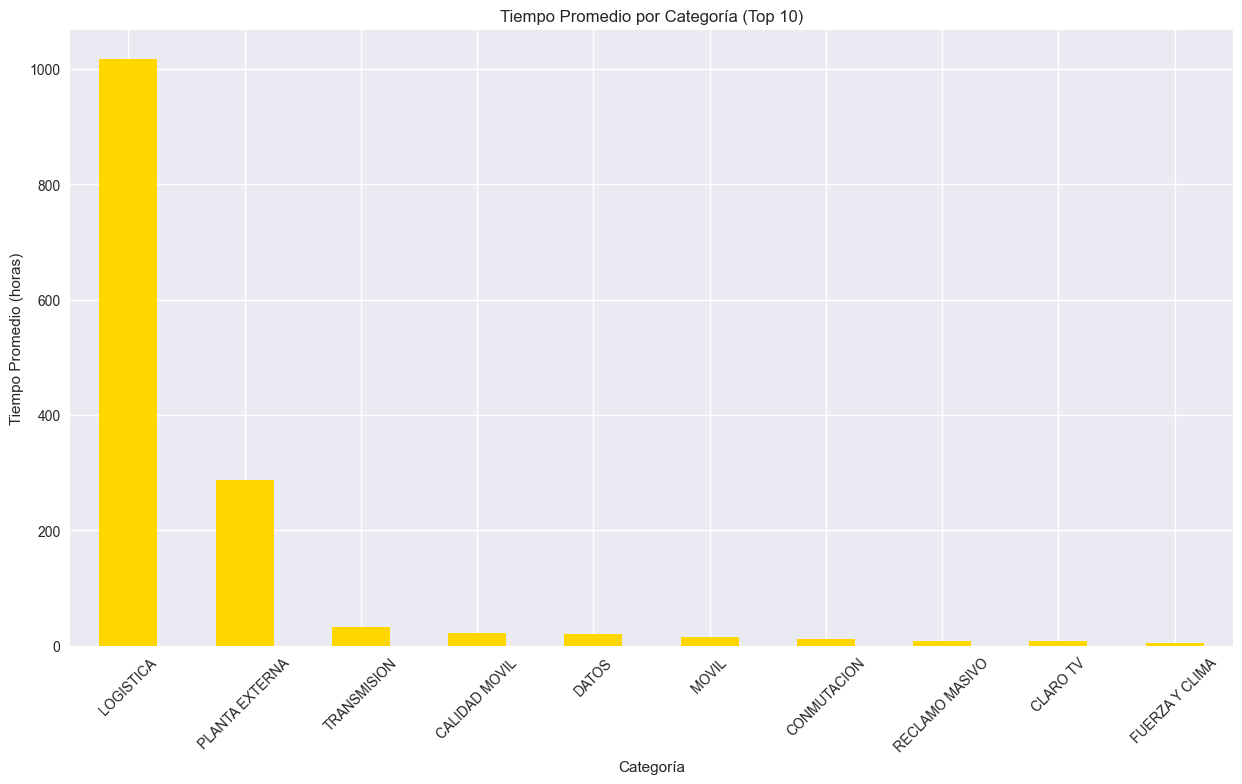

In [36]:
# 7. Tiempo promedio por categoría (top 10)

tiempo_por_cat = df.groupby("categoria")["tiempo_total"].mean().sort_values(ascending=False).head(10)
tiempo_por_cat.plot(kind="bar", color="gold")
plt.title("Tiempo Promedio por Categoría (Top 10)")
plt.xlabel("Categoría")
plt.ylabel("Tiempo Promedio (horas)")
plt.xticks(rotation=45)



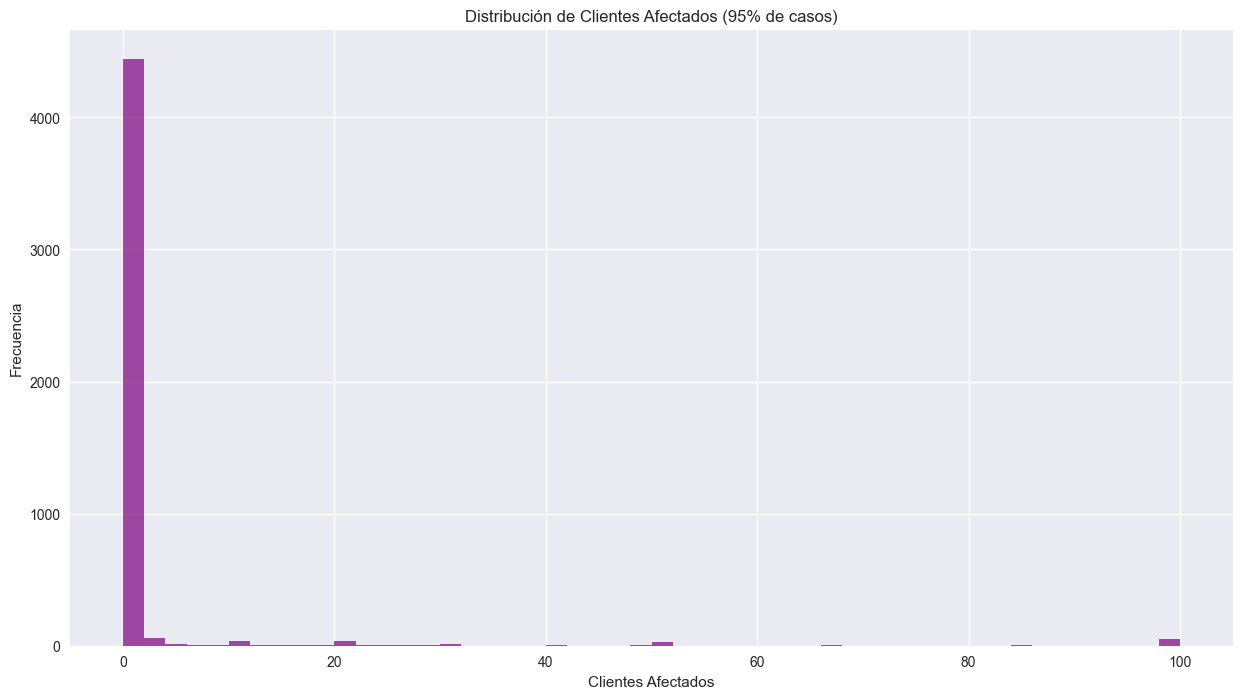

In [35]:
# 8. Distribución de clientes afectados
if "tg_cant_clientes_afectados" in df.columns:
    clientes = df["tg_cant_clientes_afectados"]
    plt.hist(clientes[clientes <= clientes.quantile(0.95)], bins=50, alpha=0.7, color="purple")
    plt.title("Distribución de Clientes Afectados (95% de casos)")
    plt.xlabel("Clientes Afectados")
    plt.ylabel("Frecuencia")


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Lun'),
  Text(1, 0, 'Mar'),
  Text(2, 0, 'Mié'),
  Text(3, 0, 'Jue'),
  Text(4, 0, 'Vie'),
  Text(5, 0, 'Sáb'),
  Text(6, 0, 'Dom')])

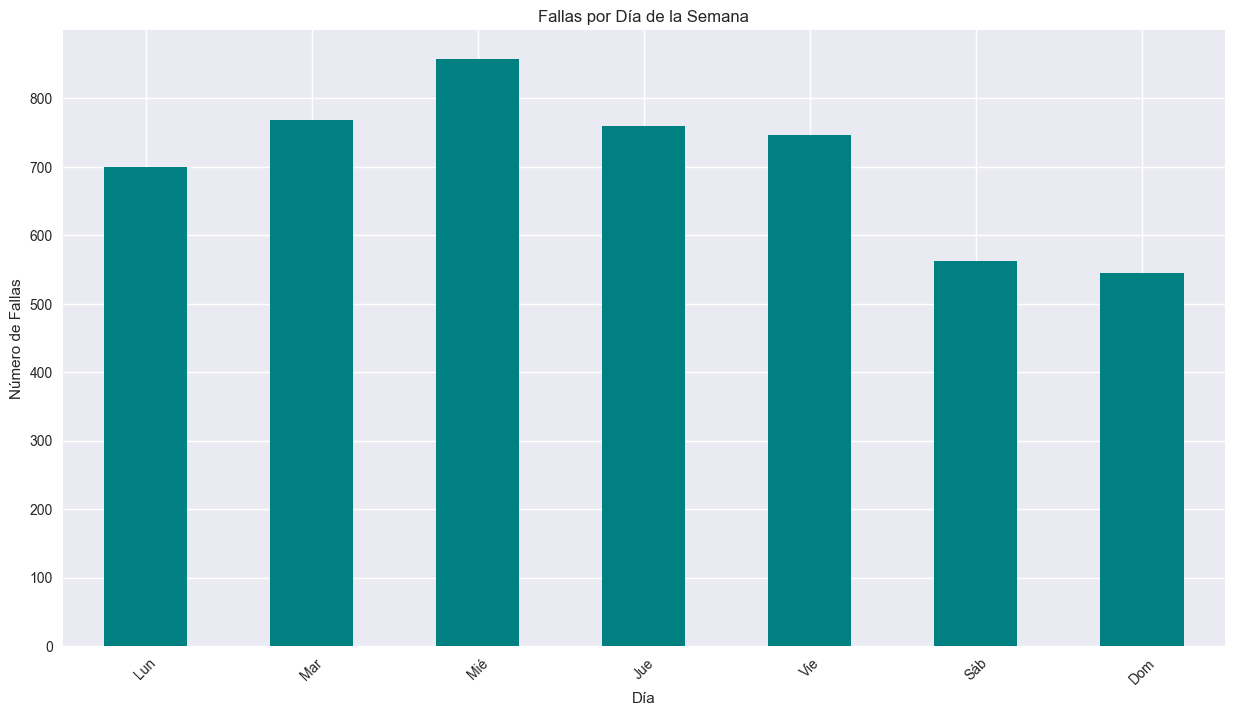

In [34]:
# 9. Fallas por día de la semana
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_names_es = ["Lun", "Mar", "Mié", "Jue", "Vie", "Sáb", "Dom"]
dow_counts = df["inicio_falla"].dt.day_name().value_counts().reindex(day_order)
dow_counts.index = day_names_es
dow_counts.plot(kind="bar", color="teal")
plt.title("Fallas por Día de la Semana")
plt.xlabel("Día")
plt.ylabel("Número de Fallas")
plt.xticks(rotation=45)

Text(158.22222222222223, 0.5, 'Severidad')

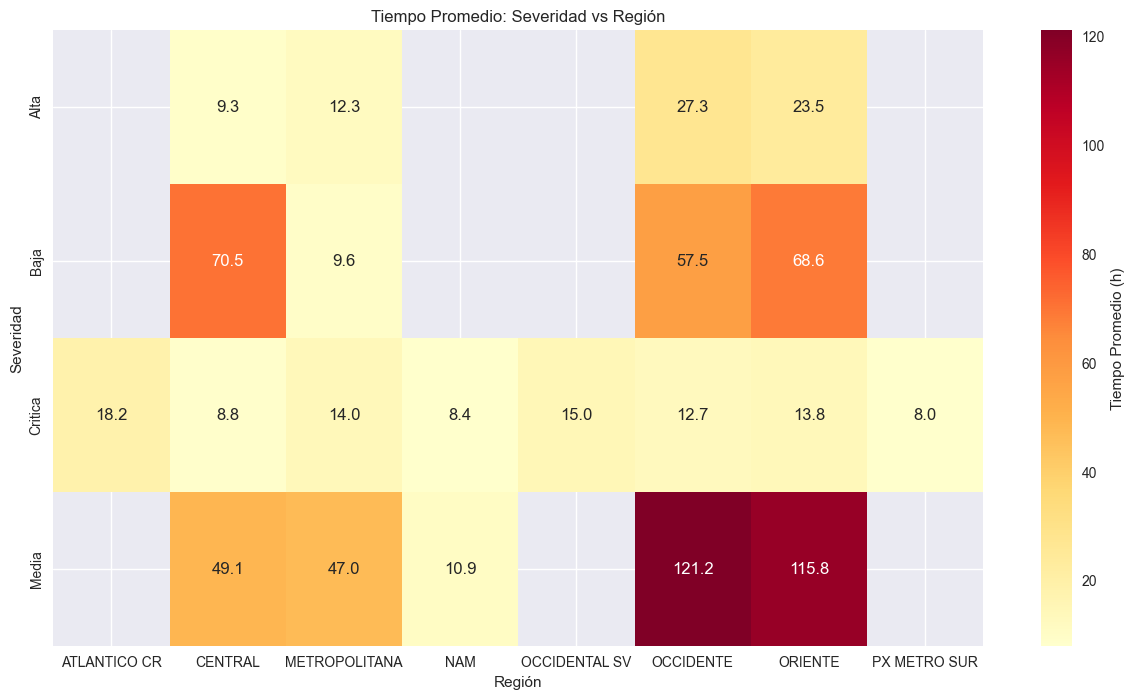

In [33]:
# 10. Heatmap: Severidad vs Región (tiempo promedio)

heatmap_data = df.groupby(["severidad", "tg_region"])["tiempo_total"].mean().unstack()
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", 
            cbar_kws={"label": "Tiempo Promedio (h)"})
plt.title("Tiempo Promedio: Severidad vs Región")
plt.xlabel("Región")
plt.ylabel("Severidad")

In [ ]:
# REPORTE EJECUTIVO - HALLAZGOS CLAVE

print("\n📋 REPORTE EJECUTIVO - HALLAZGOS CLAVE")
print("=" * 60)

if df is not None:
    # Métricas clave
    total_fallas = len(df)
    tiempo_promedio = df["tiempo_total"].mean()
    tiempo_mediano = df["tiempo_total"].median()

    print(f"\n🎯 MÉTRICAS CLAVE:")
    print(f"   • Total de fallas analizadas: {total_fallas:,}")
    print(f"   • Tiempo promedio de resolución: {tiempo_promedio:.1f} horas")
    print(f"   • Tiempo mediano de resolución: {tiempo_mediano:.1f} horas")
    print(f"   • Período analizado: {df['inicio_falla'].min().date()} a {df['inicio_falla'].max().date()}")

    # Top hallazgos
    print(f"\n🔍 HALLAZGOS PRINCIPALES:")

    # 1. Severidad más común
    sev_mas_comun = df["severidad"].value_counts().index[0]
    sev_pct = (df["severidad"].value_counts().iloc[0] / len(df)) * 100
    print(f"   1. Severidad más común: {sev_mas_comun} ({sev_pct:.1f}% de casos)")

    # 2. Categoría más problemática
    cat_mas_comun = df["categoria"].value_counts().index[0]
    cat_pct = (df["categoria"].value_counts().iloc[0] / len(df)) * 100
    print(f"   2. Categoría más afectada: {cat_mas_comun} ({cat_pct:.1f}% de casos)")

    # 3. Región más afectada
    region_mas_afectada = df["tg_region"].value_counts().index[0]
    region_pct = (df["tg_region"].value_counts().iloc[0] / len(df)) * 100
    print(f"   3. Región más afectada: {region_mas_afectada} ({region_pct:.1f}% de casos)")

    # 4. Hora pico
    hora_pico = df["inicio_falla"].dt.hour.value_counts().index[0]
    hora_pct = (df["inicio_falla"].dt.hour.value_counts().iloc[0] / len(df)) * 100
    print(f"   4. Hora pico de fallas: {hora_pico:02d}:00h ({hora_pct:.1f}% de casos)")

    # 5. Día más problemático
    dia_problematico = df["inicio_falla"].dt.day_name().value_counts().index[0]
    dia_pct = (df["inicio_falla"].dt.day_name().value_counts().iloc[0] / len(df)) * 100
    print(f"   5. Día más problemático: {dia_problematico} ({dia_pct:.1f}% de casos)")

    # SLA compliance
    within_24h = (df["tiempo_total"] <= 24).sum()
    sla_compliance = (within_24h / len(df)) * 100
    print(f"   6. Cumplimiento SLA 24h: {sla_compliance:.1f}% ({within_24h:,} casos)")

    # Casos extremos
    casos_extremos = (df["tiempo_total"] > 72).sum()
    pct_extremos = (casos_extremos / len(df)) * 100
    print(f"   7. Casos extremos (>72h): {casos_extremos:,} ({pct_extremos:.1f}%)")

    print(f"\n📊 OPORTUNIDADES DE MEJORA:")
    print(f"   • Enfocar en categoría '{cat_mas_comun}' que representa el {cat_pct:.1f}% de casos")
    print(f"   • Optimizar recursos en región '{region_mas_afectada}' (mayor volumen)")
    print(f"   • Reforzar staffing alrededor de las {hora_pico:02d}:00h (hora pico)")
    print(f"   • Investigar patrones específicos de días {dia_problematico}")
    print(f"   • {100-sla_compliance:.1f}% de casos exceden SLA de 24h - oportunidad de mejora")

    print(f"\n✅ EDA COMPLETO TERMINADO - Notebook convertido exitosamente!")
    print(f"📊 Total de registros analizados: {len(df):,}")
    print(f"📅 Período: {df['inicio_falla'].dt.year.min()}-{df['inicio_falla'].dt.year.max()}")



📋 REPORTE EJECUTIVO - HALLAZGOS CLAVE

🎯 MÉTRICAS CLAVE:
   • Total de fallas analizadas: 4,938
   • Tiempo promedio de resolución: 23.3 horas
   • Tiempo mediano de resolución: 8.6 horas
   • Período analizado: 2022-02-15 a 2025-07-15

🔍 HALLAZGOS PRINCIPALES:
   1. Severidad más común: Critica (73.8% de casos)
   2. Categoría más afectada: DATOS (40.1% de casos)
   3. Región más afectada: ORIENTE (30.5% de casos)
   4. Hora pico de fallas: 11:00h (8.8% de casos)
   5. Día más problemático: Wednesday (17.4% de casos)
   6. Cumplimiento SLA 24h: 93.1% (4,597 casos)
   7. Casos extremos (>72h): 84 (1.7%)

📊 OPORTUNIDADES DE MEJORA:
   • Enfocar en categoría 'DATOS' que representa el 40.1% de casos
   • Optimizar recursos en región 'ORIENTE' (mayor volumen)
   • Reforzar staffing alrededor de las 11:00h (hora pico)
   • Investigar patrones específicos de días Wednesday
   • 6.9% de casos exceden SLA de 24h - oportunidad de mejora

✅ EDA COMPLETO TERMINADO - Notebook convertido exitosame